# Problem #2: Simulating Cox-Ingersoll-Ross Process

## CIR Formula:
$$dX_t = k(\theta - X_t)dt + \sigma\sqrt{X_t}dW_t$$


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import fsolve

## Initializing Variables

In [2]:
X0 = 0.05
k = 1
theta = 0.05
sigma = np.sqrt(2*theta*k)
T = 10
dt = 1/(T*365)
n = int(T/dt) + 1
M = 100

## Euler-Murayama Scheme
$$X_{i+1} = (1-k\Delta t)X_i + K\theta\Delta t + \sigma\sqrt{X_i^{+}}\Delta W$$

Average count of negative numbers: 6.19


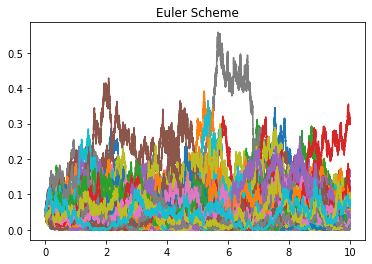

Time required for the code: 2.185


In [3]:
start = time()
X = np.zeros((M,n))   
X[:,0] = X0
for t in range(1,n):
    dW = np.random.randn(M)*np.sqrt(dt)
    X[:,t] = (1-k*dt)*X[:,t-1] + k*theta*dt + sigma*dW*np.sqrt(np.maximum(X[:,t-1],0))
        
print("Average count of negative numbers:",np.count_nonzero(X<0)/M)

plt.plot(np.linspace(0,T,n), X.T)
plt.savefig('OUsim.eps', format='eps')
plt.title("Euler Scheme")
plt.show()
end = time()

print('Time required for the code:', round(end-start,3))

## Milstein Scheme:
$$X_{i+1} = X_i + k(\theta-X_i)\Delta t + \sigma\sqrt{X_i}\Delta W_i + \frac{1}{2}\sigma^2\left(\Delta W_i^2-\Delta t\right)$$

Average count of negative numbers: 0.0


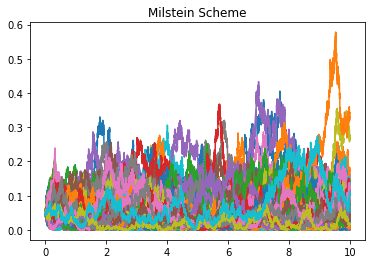

Time required for the code: 2.227


In [4]:
start = time()

X = np.zeros((M,n))   
X[:,0] = X0
for t in range(1,n):
    dW = np.random.randn(M)*np.sqrt(dt)
    X[:,t] = (1-k*dt)*X[:,t-1] + k*theta*dt + sigma*dW*np.sqrt(np.maximum(X[:,t-1],0)) + (((sigma**2)*(dW**2-dt))/4)
        
print("Average count of negative numbers:",np.count_nonzero(X<0)/M)

plt.plot(np.linspace(0,T,n), X.T)
plt.savefig('OUsim.eps', format='eps')
plt.title("Milstein Scheme")
plt.show()

end = time()
print('Time required for the code:', round(end-start,3))

## Ito's Lemma

$$\ dY_{t} = \frac{\partial Y}{\partial t} dt + \frac{\partial Y}{\partial x} dX_{t} + \frac{1}{2}\frac{\partial^{2} Y}{\partial x^{2}} (dX_{t})^{2}$$

## Implicit Scheme

$$\sigma\sqrt{X_{i}}\Delta{W_i} = - \frac{\sigma^2}{2}{\Delta{t}\ + \sigma\sqrt{X_{i+1}}\Delta{W_{i}}}$$

$${X_{i+1}} = \left(1-k\Delta{t}\right){X_i} + \left(k\theta - \frac{\sigma^2}{2}\right)\Delta{t} + \sigma\sqrt{X_{i+1}}\Delta{W_i}$$


/var/folders/bc/qhyj_sy55h15tgpbwdshz7gw0000gn/T/ipykernel_6521/1966319048.py:22: RuntimeWarning: invalid value encountered in sqrt
  f = lambda xnext: (1-k*dt)*xprev + (k*theta - (sigma**2)/2)*dt + sigma*np.sqrt(xnext)*dW - xnext
/Users/amri8esh/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Average count of negative numbers: 0.0


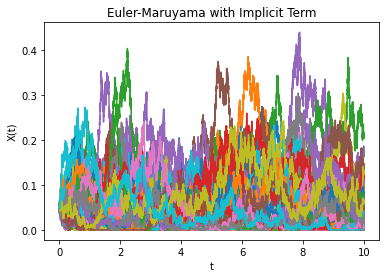

Time required for the code:  215.59071493148804


In [5]:
# Initialize Variables

X0 = 0.05
k = 1
theta = 0.05
sigma = np.sqrt(2*theta*k)
T = 10
dt = 1/(T*365)
n = int(T/dt) + 1
M = 100

start = time()

# Define the Euler-Maruyama scheme with implicit term
def euler_implicit(X0,k, theta, sigma, T, dt, M):
    X = np.zeros((M, int(T/dt)+1))
    X[:,0] = X0
    for i in range(M):
        for j in range(int(T/dt)):
            dW = np.random.randn()*np.sqrt(dt)
            xprev = X[i,j]
            f = lambda xnext: (1-k*dt)*xprev + (k*theta - (sigma**2)/2)*dt + sigma*np.sqrt(xnext)*dW - xnext
            X[i,j+1] = fsolve(f, xprev, xtol = 1e-4)
    return X

# Call the function and plot the results
x = euler_implicit(X0, k, theta, sigma, T, dt, M)

print("Average count of negative numbers:",np.count_nonzero(x<0)/M)

t = np.linspace(0, T, int(T/dt)+1)
plt.plot(t, x.T)
plt.xlabel('t')
plt.ylabel('X(t)')
plt.title('Euler-Maruyama with Implicit Term')
plt.show()
end = time()

print('Time required for the code: ', end-start)